#### Ciência de Dados
* Faça Você Mesmo:
Arquivo slr12.csv
1. Franquias
    1. FraAnual: Taxa Anual
    2. CusInic: Investimento Inicial
2. Criar um modelo de regressão linear para prever 
qual será o Investimento inicial necessário de uma 
franquia a partir da Taxa Anual cobrado pelo 
franqueador

In [3]:
# Importação des Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.formula.api as sm

In [4]:
# Base de dados e o tamanho
dados = pd.read_csv('./Data/slr12.csv', sep=';')
dados.shape

(36, 2)

In [5]:
# Visualizando a base de dados
dados.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [6]:
# Definição das variáveis X e Y, X FrqAnual é a variável independente e Y
# CusInic é a variável dependente
X = dados.iloc[:, 0].values
y = dados.iloc[:, 1].values
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850], dtype=int64)

In [7]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [8]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve 
# ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [9]:
# Coeficiente Angular e Coeficiente Linear
a_coeff = modelo.coef_
l_coeff = modelo.intercept_

In [10]:
# Visualizando os Coeficiente 
print(f'Coeficiente Angular: {a_coeff} \n Coeficiente Linear {l_coeff}')

Coeficiente Angular: [0.37315794] 
 Coeficiente Linear 867.6042222620558


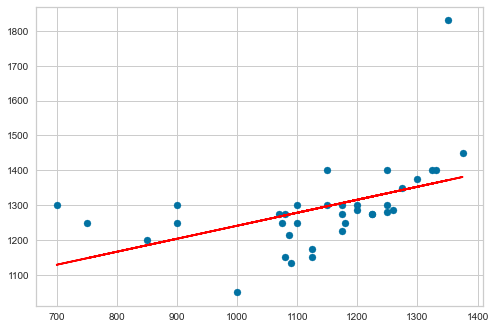

In [11]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [15]:
# Calculando a formala
modelo.intercept_ + modelo.coef_ * dados['CusInic']

0     1259.420055
1     1296.735849
2     1320.244799
3     1343.380591
4     1352.709539
5     1352.709539
6     1390.025333
7     1390.025333
8     1334.051642
9     1550.483245
10    1371.367436
11    1408.683229
12    1352.709539
13    1352.709539
14    1343.380591
15    1380.696384
16    1347.112170
17    1390.025333
18    1390.025333
19    1347.112170
20    1343.380591
21    1291.138480
22    1334.051642
23    1343.380591
24    1296.735849
25    1334.051642
26    1343.380591
27    1324.722694
28    1345.246380
29    1352.709539
30    1334.051642
31    1306.064797
32    1352.709539
33    1334.051642
34    1352.709539
35    1315.393745
Name: CusInic, dtype: float64

In [16]:
#score R^2
modelo.score(X, y)

0.2275359181555101

In [17]:
# Geração das previsões
previsoes = modelo.predict(X)
previsoes

array([1240.76215819, 1287.40690018, 1273.22689862, 1266.88321371,
       1278.07795178, 1296.73584858, 1334.05164217, 1296.73584858,
       1278.07795178, 1371.36743577, 1343.38059057, 1380.69638416,
       1306.06479698, 1315.39374538, 1306.06479698, 1352.70953897,
       1337.78322153, 1363.90427705, 1362.03848737, 1315.39374538,
       1324.72269377, 1274.34637242, 1268.74900339, 1270.61479307,
       1270.61479307, 1307.93058666, 1324.72269377, 1306.06479698,
       1334.05164217, 1334.05164217, 1147.47267421, 1287.40690018,
       1128.81477741, 1203.4463646 , 1203.4463646 , 1184.7884678 ])

In [18]:
# Criação do modelo, utilizando a biblioteca statsmodel 
#podemos ver r ajustadodo r2
modelo_ajustado = sm.ols(formula = 'FrqAnual ~ CusInic', data = dados)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FrqAnual   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Fri, 22 Jul 2022   Prob (F-statistic):            0.00327
Time:                        09:43:51   Log-Likelihood:                -228.31
No. Observations:                  36   AIC:                             460.6
Df Residuals:                      34   BIC:                             463.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5467    249.872      1.391      0.173    -160.254     855.348
CusInic        0.6098      0.193      3.165      0.003       0.218       1.001
==============================================================================
Omnibus:                       18.151   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.634
Skew:                          -1.601   Prob(JB):                     2.01e-05
Kurtosis:                       5.043   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Previsão para somente um valor
modelo.predict([[1]])

array([867.9773802])

In [20]:
#valor anual da franquina
valr =  1300
modelo.predict([[valr]])

array([1352.70953897])